### Data from april 1st to 15
### Volume--key metric used to understand the overall sales performance
### Net Sales Value=Total Sales Value−Sales Returns−Discounts−Allowances
### Total Sales Value=Quantity of Goods Sold×Price per Unit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [144]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
num_col= [i for i in df.columns if df[i].dtype!='O']
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

#### Can use describe function to get all the information about the data like mean,median,standrad deviation etc..Or can use different for each

In [6]:
df[num_col].describe() 

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


####   mean--> it indicates the average of information about the sales..
####   ex: what is the average price of the product?,average discount amount given..average amount people want to spend are described by the mean of price
#### mean value gives the representative value where majority of the data value revolves around this..(except outliers)

In [8]:
df[num_col].mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

#### median--> It is the middle value of the sorted column
#### Ex: What is the typical sales amount is indicated by median                                                                                ( average price is indicated by mean and price of a average product is indicated by median)                                                  
#### It devides the dataset into two equal parts...When you want to get a typical value of a column which is having outliers median will be used.


#### Mode--> mode indicates the frequently occuring value in a perticular variable
#### It can be used to indicate: which discount rate appears most often.

In [12]:
df[num_col].mode().iloc[0]

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

#### standard deviation: It indiacates the average deviation from perticular point,here from mean.
#### Indicates the spreadness of the data from the mean
#### ex: the std of price is the average of how much the price value far from mean  

In [14]:
df[num_col].std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

#### histogram is used to analyze the frequency distribution

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

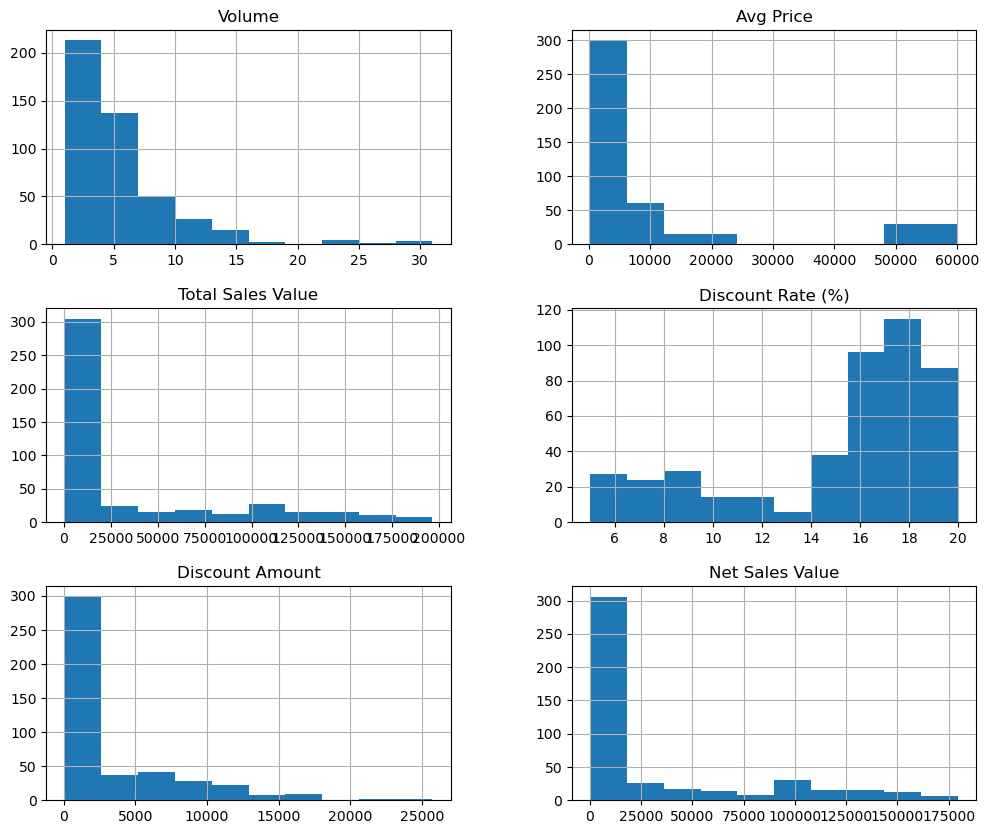

In [16]:
df[num_col].hist(figsize=(12,10))

In [18]:
df[num_col].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


<Axes: >

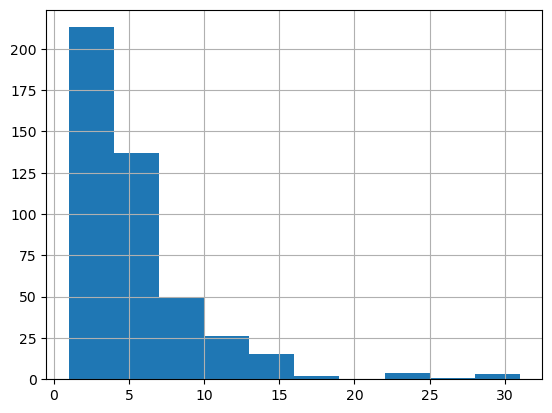

In [19]:
# also can be drawn superate for each
df["Volume"].hist()

#### 1.volume:most of volume lies between 0-4  and data is more on left side => Right Skewed
#### Lower Bound:-1.50 Upper Bound:10.50
#### there is no outlier present below lower_bound but some outliers above upper bound

<Axes: >

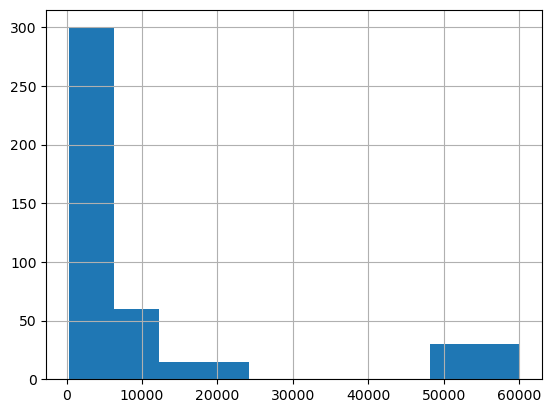

In [21]:
df["Avg Price"].hist()

#### 2.Avg Price :most of Avg price value lies between 0-60000(aproximatly)  and data is more on left side => Right Skewed
#### Lower Bound:-13987.50 Upper Bound:24552.50
#### there is no data point present below lower_bound but some are above upper bound,there fore,outliers present above the wisker.(appr 30)

<Axes: >

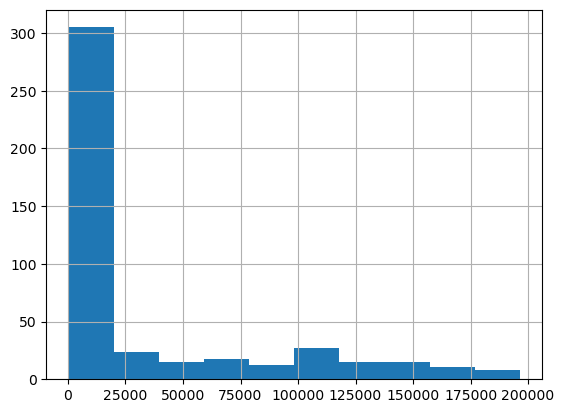

In [23]:
df["Total Sales Value"].hist()

#### 2.Total sales value :most of Total sales value lies between 0-20000(aproximatly)  and data is more on left side => Right Skewed
#### Lower Bound:-73050.00  Upper Bound:128950.00
#### there is no data point present below lower_bound but some are above upper bound,there fore,outliers present above the wisker.

<Axes: >

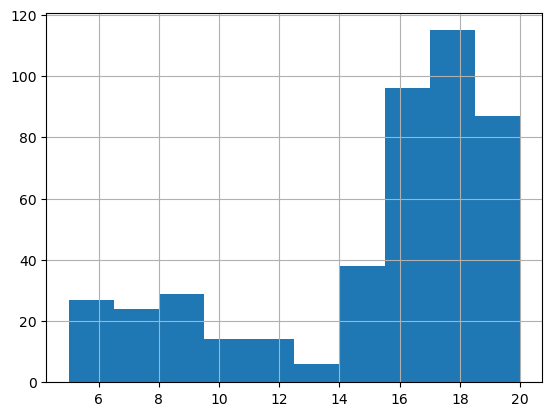

In [25]:
df["Discount Rate (%)"].hist()

#### 3.Discount Rate (%) :most of Discount rate values lies between 15-20 (aproximatly)  and data is more on Right side => Left Skewed
#### Lower Bound: 7.740579  Upper Bound:24.339202
#### there is some data point present below lower_bound but not above upper bound,there fore,outliers present below the wisker.(app 45)

<Axes: >

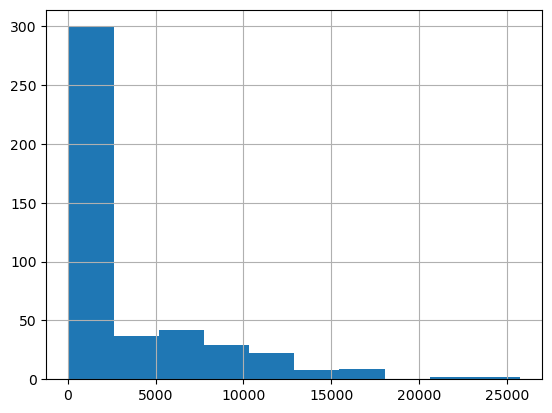

In [27]:
df["Discount Amount"].hist()

#### 4.Discount Amount:most of discount amount values lies between 0-20000(aproximatly)  and data is more on left side => Right Skewed
#### Lower Bound:-6823.594  Upper Bound:12600.549611
#### there is no data point present below lower_bound but some are above upper bound,there fore,outliers present above the wisker.(20)

<Axes: >

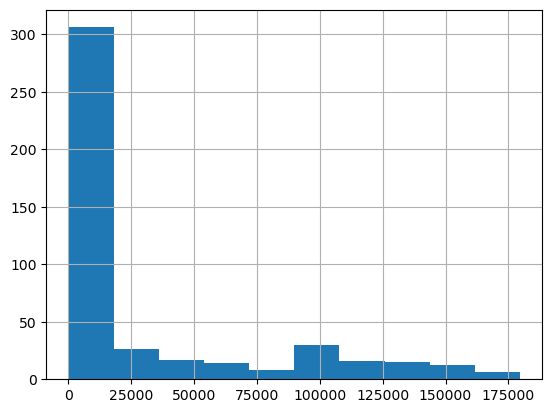

In [29]:
df["Net Sales Value"].hist()

#### 5.Net Sales Value::most of the net sales value lies between 0-20000(aproximatly)  and data is more on left side => Right Skewed
#### Lower Bound:-66266.347664  Upper Bound:116316.469161
#### there is no data point present below lower_bound but some are above upper bound,there fore,outliers present above the wisker.(app 60)

In [31]:
import numpy as np
Q1=df[num_col].quantile(0.25)
Q3=df[num_col].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f'LOWER BOUND:\n {lower_bound}  \n Upper Bound \n {upper_bound}')

LOWER BOUND:
 Volume                  -1.500000
Avg Price           -13987.500000
Total Sales Value   -73050.000000
Discount Rate (%)        7.740579
Discount Amount      -6823.594880
Net Sales Value     -66266.347664
dtype: float64  
 Upper Bound 
 Volume                   10.500000
Avg Price             24552.500000
Total Sales Value    128950.000000
Discount Rate (%)        24.339202
Discount Amount       12600.549611
Net Sales Value      116316.469161
dtype: float64


<Axes: >

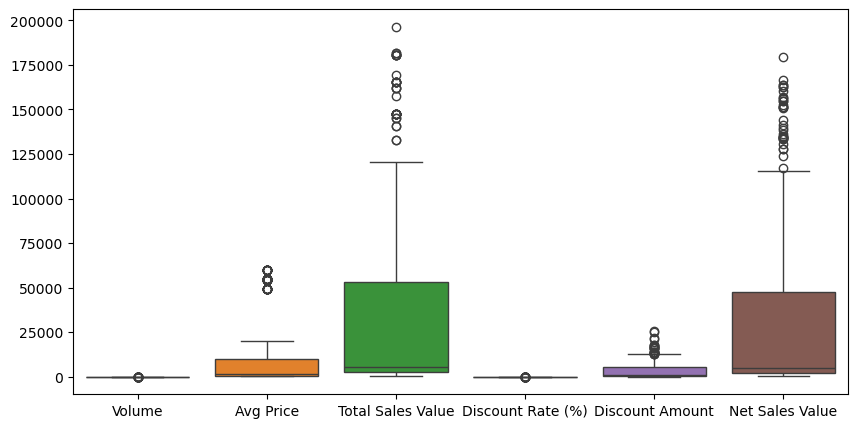

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(df[num_col])

##### Volume:only few outliers present
##### Avg Price:Few outliers(above upperbound)
##### Total Sales Value:Many outliers (above upperbound)
##### Discount rate:only few outliers
##### Discount Amount: few outliers(above upperbound)
##### Net sales Value: Many outliers are present(above upperbound)

### BOX PLOT
#### Box plot helps to identify the spreadness of the data...Which includes the statistical measures such as:
#### Minimum: The lowest point, excluding outliers(if min<lower_bound)
#### Maximum: The highest point, excluding outliers.(if max<upper_bound)
#### Interquartile Range (IQR): The difference between Q3 and Q1, representing the middle 50% of the data.
#### Whiskers: These extend to the smallest and largest values within 1.5 times the IQR from the quartiles.(lower_bound,upper_bound)
#### Outliers: Data points that fall outside the range of the whiskers
#### First Quartile (Q1): The value below which 25% of the data lies.
#### Median (Q2): The middle value (50th percentile).
#### Third Quartile (Q3): The value below which 75% of the data lies.

In [38]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [39]:
cat_cols=[i for i in df.columns if df[i].dtype=='O']
cat_cols

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

#### Bar chart provides the frequencies of each categorical value counts for each categorical value in it

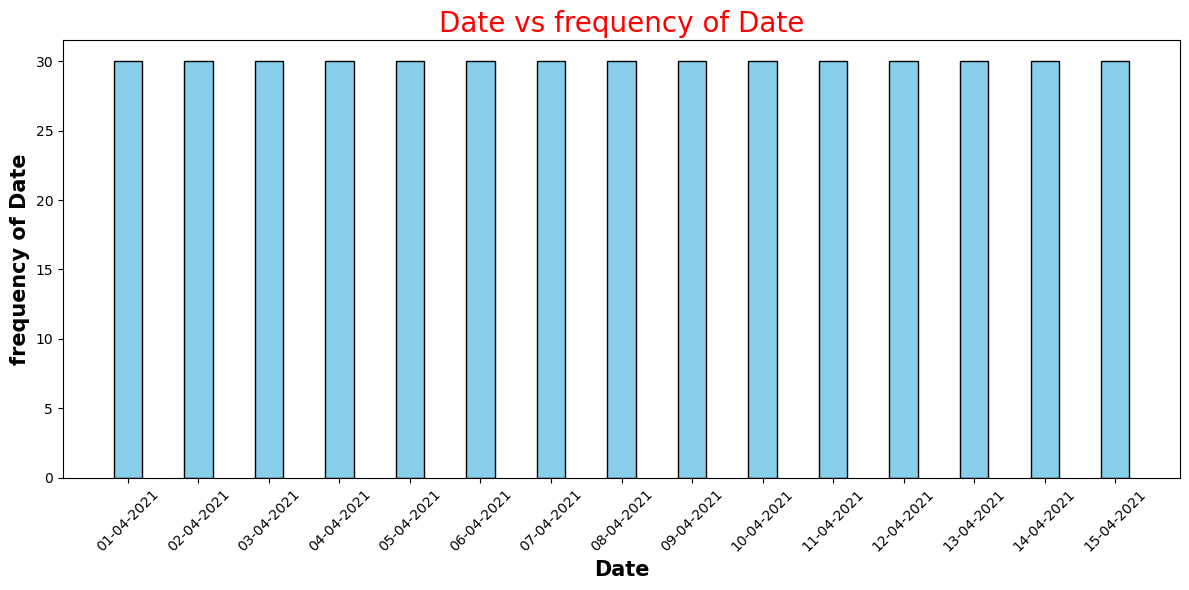

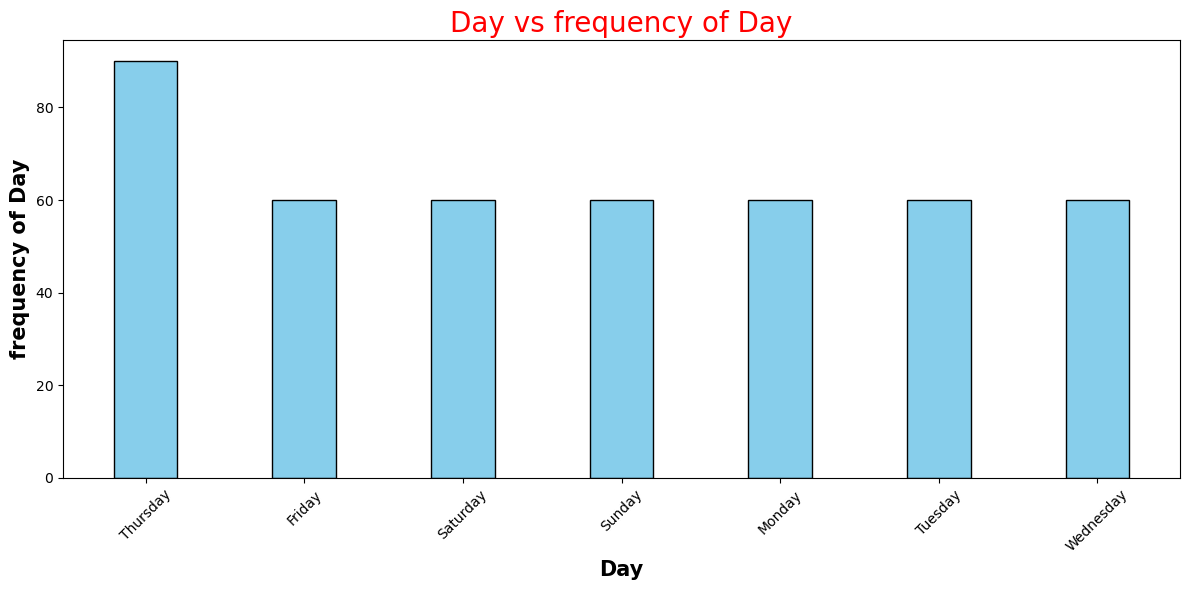

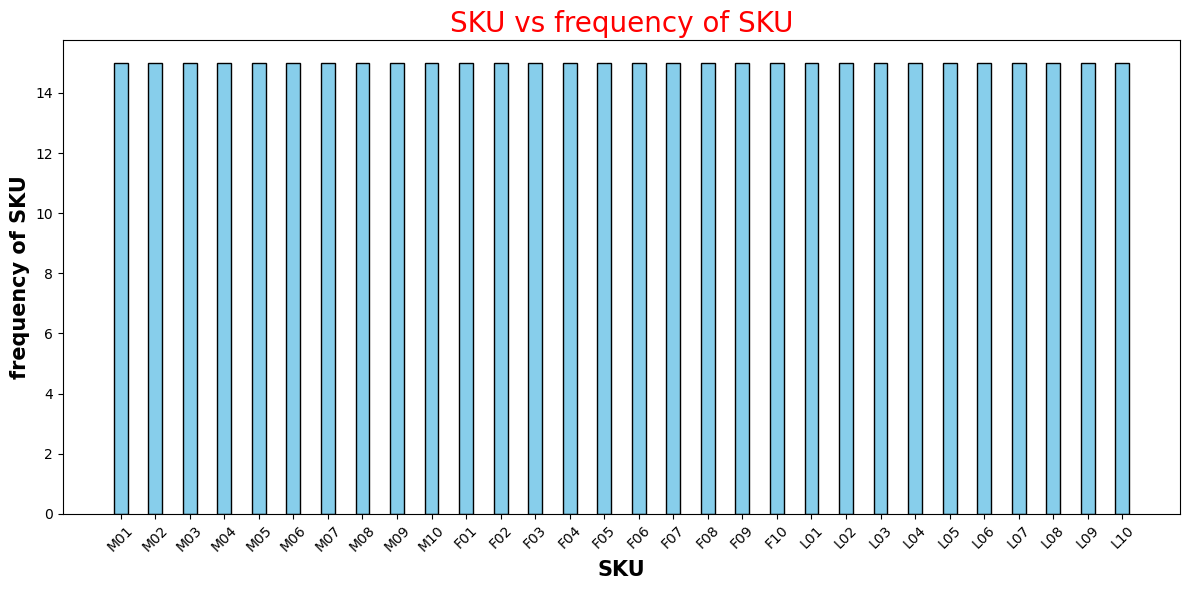

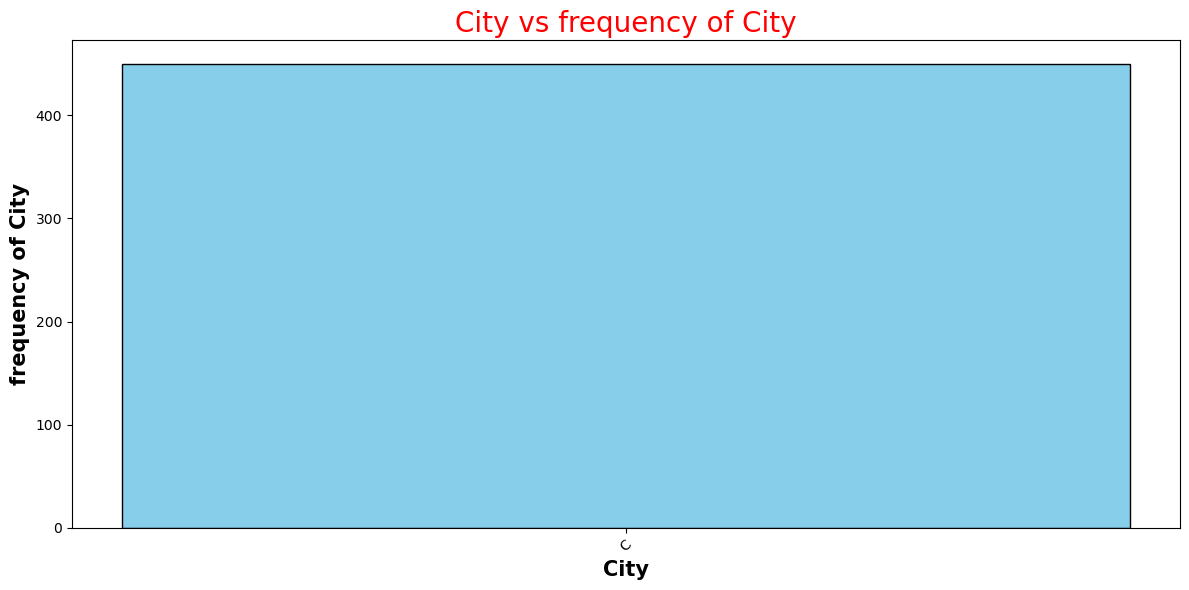

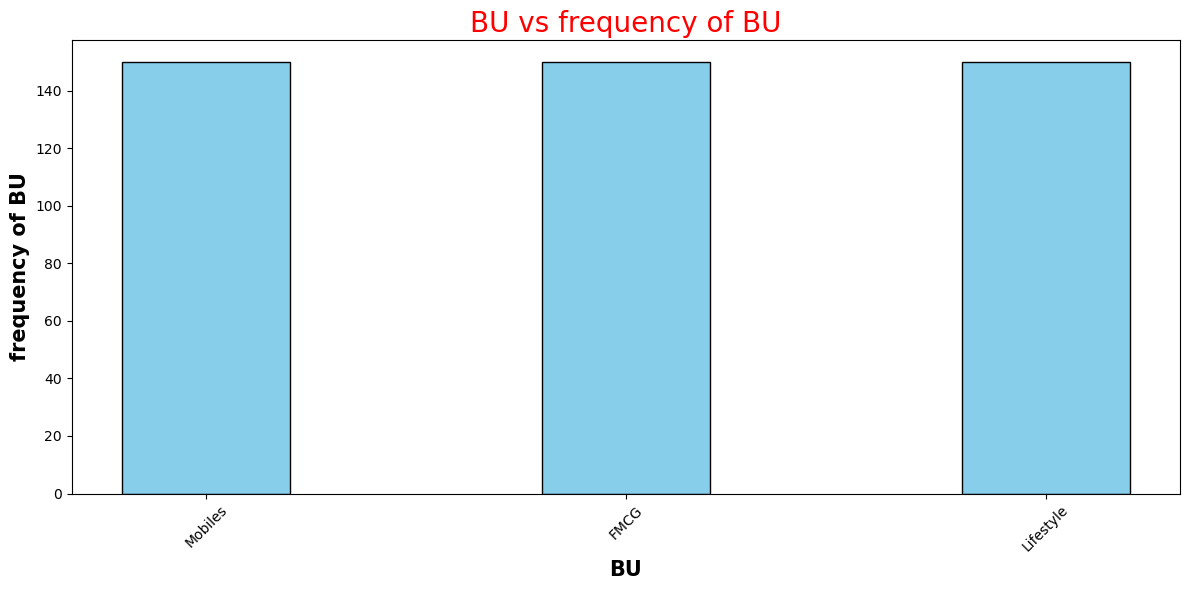

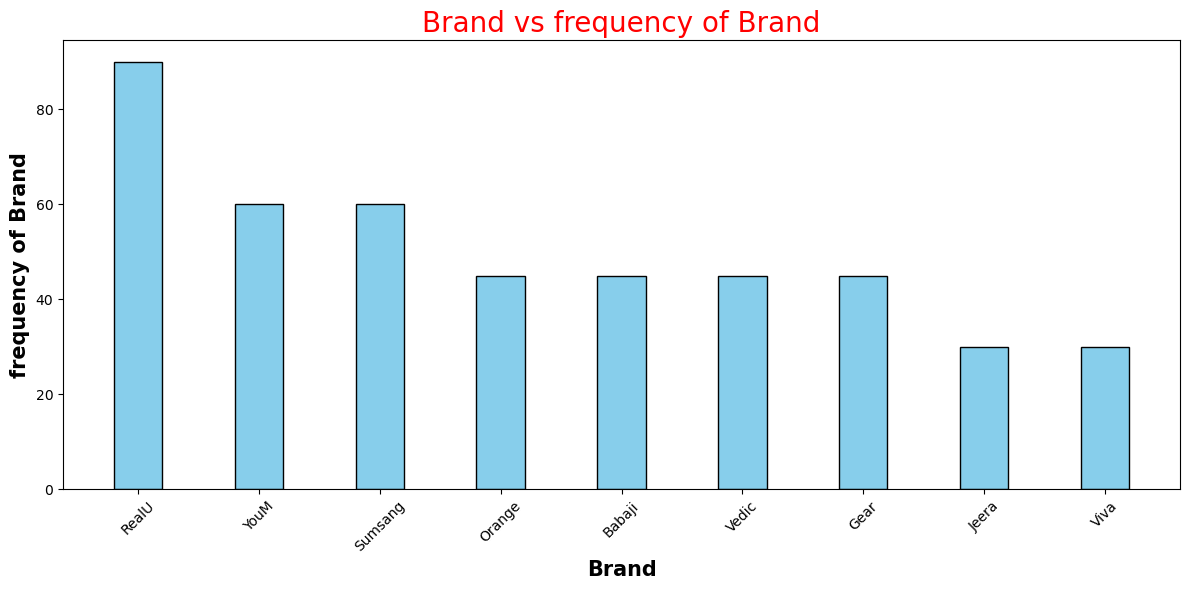

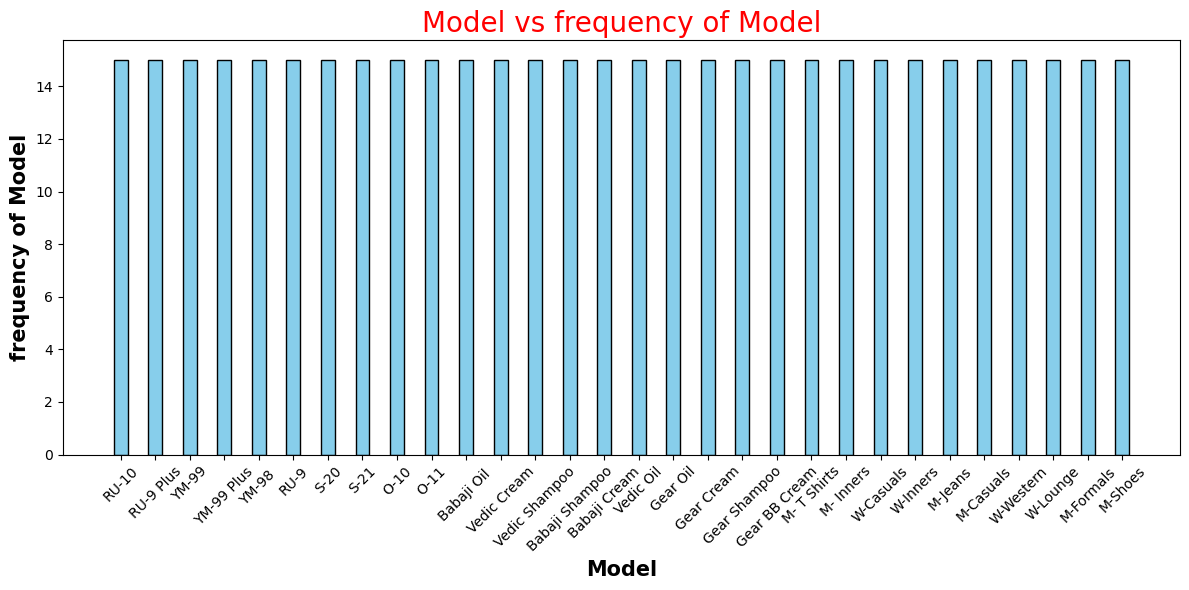

In [41]:
## Bar Chart
for i in cat_cols:
    plt.figure(figsize=(12,6))
    plt.bar(df[i].unique(),df[i].value_counts(),width=0.4,edgecolor='black',color='skyblue')
    plt.title(i+" vs frequency of "+i,color='red',size=20)
    plt.xlabel(i,size=15,weight='bold')
    plt.ylabel("frequency of "+ i,size=15,weight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Numerical data with different scales are difficult to handle by the ML algorithm..therefore it is essential to convert them to same scale

In [46]:
#### Standardization:To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
#### z=x-mue/sigma

#### Before Standardization

In [51]:
df[num_col]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [53]:
avg=df[num_col].mean()

In [55]:
s=df[num_col].std()

In [56]:
standardized_df=(df[num_col]-avg)/s

#### After standardization

In [58]:

standardized_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


### Conversion of Categorical Data into Dummy Variables
#### ML algorithm can only understand numbers...therefore by converting categorical data to numerical it is easy to understand adn will get a good model.

In [136]:
## for nominal data we use OneHotEncoder and for ordinal we use OrdinalEncoder(for features) and LabelEncoder(for target)
from sklearn.preprocessing import OneHotEncoder

In [138]:
one_hot=OneHotEncoder()
encoded_arr=one_hot.fit_transform(df[cat_cols]).toarray()
encoded_df=pd.DataFrame(encoded_arr,columns=one_hot.get_feature_names_out(cat_cols))
encoded_df.head()

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [140]:
df.drop(cat_cols,axis=1,inplace=True)
df.join(encoded_df)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,8100,24300,17.995663,4372.946230,19927.053770,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
447,2,1600,3200,18.965550,606.897606,2593.102394,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
448,3,1900,5700,16.793014,957.201826,4742.798174,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
## OR BY get_dummies method also works same as onehot encoder with less steps
pd.get_dummies(df,dtype='int')

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
